In [1]:
#Req1
#Libraries Importing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100
from sklearn.model_selection import train_test_split
from keras import layers,Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPooling2D,Dropout
from tensorflow.keras.utils import to_categorical
import optuna
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-04-27 19:25:25.783645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745781925.972971      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745781926.028442      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#Data Loading
(x, y)= cifar100.load_data()[0]
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#Data Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=42)

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,train_size=0.89,random_state=42)


In [4]:
#Req2
datagen = ImageDataGenerator(
    rotation_range=20,            # Random rotations in degrees
    width_shift_range=0.2,        # Random horizontal translations
    height_shift_range=0.2,       # Random vertical translations
    shear_range=0.2,              # Random shear transformations
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Random horizontal flip
    fill_mode='nearest'           # Fill mode for newly created pixels
)

    # Fit the generator on the training data
datagen.fit(x_train)
#Data Normalization [0:1]
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0
x_val_norm = x_val/255.0

#Categerize the output into 100 classes
y_train_cate = to_categorical(y_train,100)
y_val_cate = to_categorical(y_val,100)
y_test_cate = to_categorical(y_test,100)

In [14]:
best_params = {'learning_rate': 0.00017132805545779658, 'batch_size': 64, 'num_layers': 1, 'filters': 256, 'dropout_rate': 0.2842644427252522, 'l2_strength': 3.247908430903704e-05}
best_model = Sequential()

# Add the first Conv2D layer with the best hyperparameters
best_model.add(layers.Conv2D(best_params['filters'], (3, 3), activation='relu', input_shape=(32, 32, 3),
                             kernel_regularizer=keras.regularizers.l2(best_params['l2_strength'])))
best_model.add(layers.Dropout(best_params['dropout_rate']))

# Add additional Conv2D layers
for _ in range(best_params['num_layers'] - 1):
    best_model.add(layers.Conv2D(best_params['filters'], (3, 3), activation='relu',
                                 kernel_regularizer=keras.regularizers.l2(best_params['l2_strength'])))
    best_model.add(layers.Dropout(best_params['dropout_rate']))

# Add the remaining layers (you can adjust as needed)
best_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
best_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
best_model.add(layers.MaxPooling2D())

best_model.add(layers.Flatten())
best_model.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(best_params['l2_strength'])))
best_model.add(layers.Dense(100, activation='softmax'))  # 100 classes for CIFAR-100

# Compile the model
best_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
                   loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the full training data
history = best_model.fit(x_train_norm, y_train_cate, epochs=20, 
               batch_size=best_params['batch_size'], validation_data=(x_val_norm, y_val_cate))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.0434 - loss: 4.3713 - val_accuracy: 0.1471 - val_loss: 3.6910
Epoch 2/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.1797 - loss: 3.5304 - val_accuracy: 0.2091 - val_loss: 3.3516
Epoch 3/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.2489 - loss: 3.1309 - val_accuracy: 0.2545 - val_loss: 3.0777
Epoch 4/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.3124 - loss: 2.8208 - val_accuracy: 0.2812 - val_loss: 3.0018
Epoch 5/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.3695 - loss: 2.5423 - val_accuracy: 0.3046 - val_loss: 2.8598
Epoch 6/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.4199 - loss: 2.2972 - val_accuracy: 0.3210 - val_loss: 2.8048
Epoch 7/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.4731 - loss: 2.0599 - val_accuracy: 0.3287 - val_loss: 2.8222
Epoch 8/20
626/626 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.5279 - loss: 1.8252 - 

In [15]:
loss, accuracy = best_model.evaluate(x_test_norm,y_test_cate)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3061 - loss: 6.6013


In [17]:
y_true = []
y_pred = []
images_list = []

# Loop over the test set
for images, labels in zip(x_test_norm, y_test):
    # Expand dimensions of the image to create a batch (shape: (1, 32, 32, 3))
    image_batch = np.expand_dims(images, axis=0)
    
    # Predict the class probabilities for the image batch
    preds = best_model.predict(image_batch, verbose=0)
    
    # Convert the softmax output to class labels
    preds_classes = np.argmax(preds, axis=1)
    
    # Append true labels and predicted labels
    y_true.append(labels)  # Append the true label (no need for .numpy() here)
    y_pred.append(preds_classes[0])  # preds_classes is an array, so we access the first value
    
    # Append the actual image for further analysis if needed
    images_list.append(images)  # No need for .numpy() here either

In [18]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
print(f"Model Recall : {recall_score(y_true,y_pred,average = 'macro')}")
print(f"Model Precision : {precision_score(y_true,y_pred,average = 'macro')}")
print(f"Model F1 Score : {f1_score(y_true,y_pred,average = 'macro')}")

Model Recall : 0.2981843579929683
Model Precision : 0.31286244168584143
Model F1 Score : 0.29645303904560794


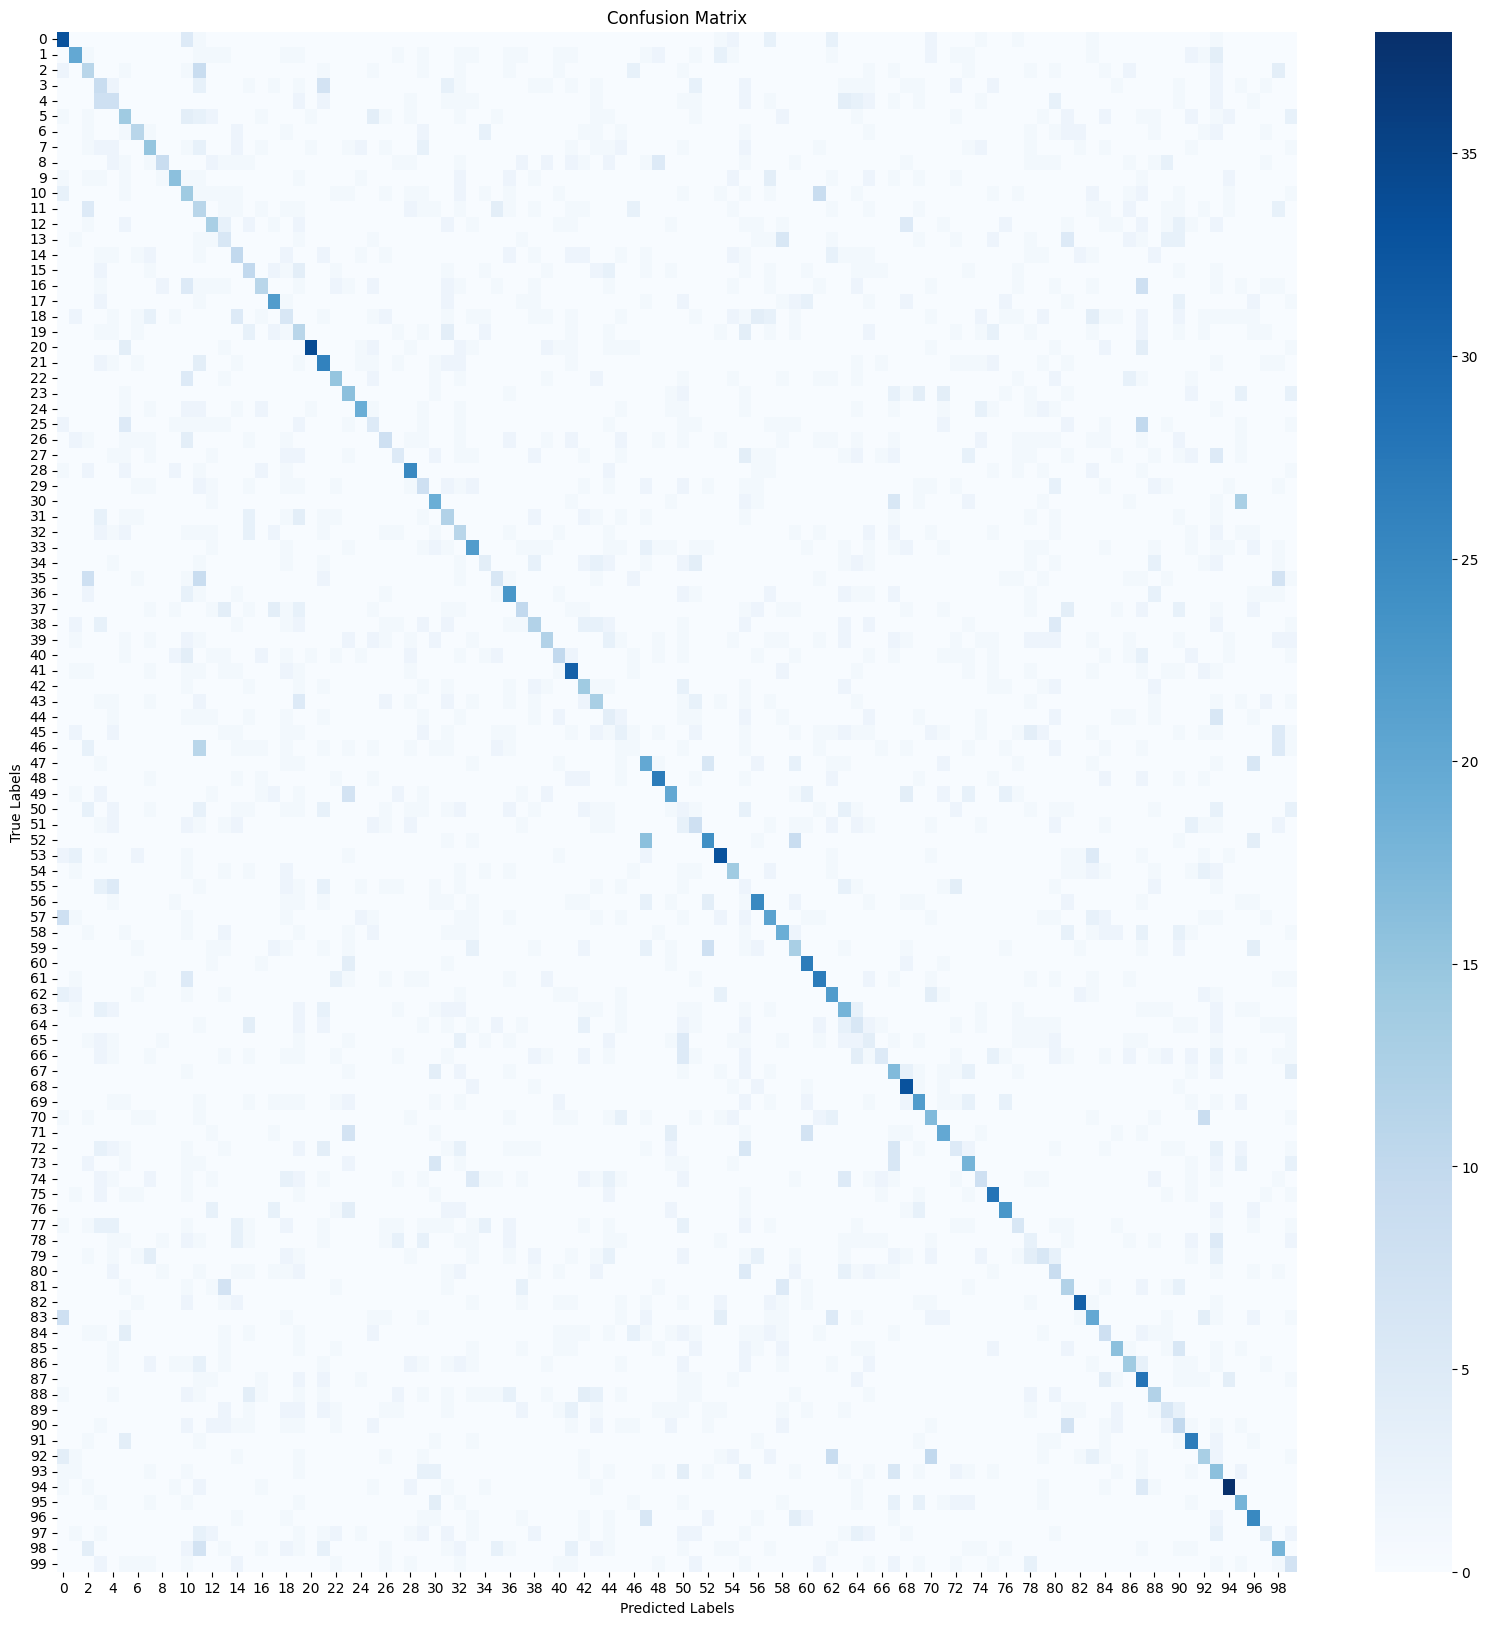

In [19]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

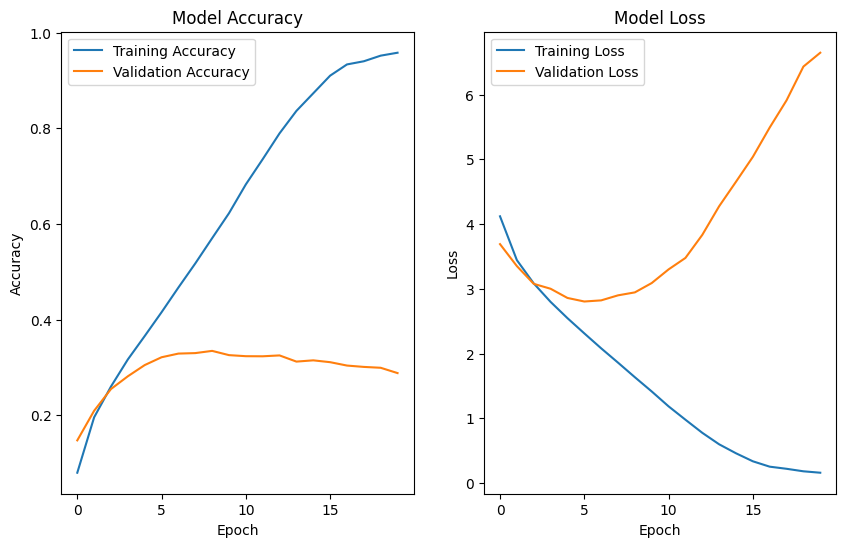

In [16]:
#plotting Model Accuracy and Loss
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
print("The Model seems to be overfitting due to the fact that validation and test accuracy is low.")
print("The Solutaion is to reduce the size of neurons or layers as the model is too complex")
print("Sorry Couldn't re train the model due to insufficient time")

The Model seems to be overfitting due to the fact that validation and test accuracy is low.
The Solutaion is to reduce the size of neurons or layers as the model is too complex
Sorry Couldn't re train the model due to insufficient time


In [ ]:
print("The Project is spillted into 2 parts due to session crashed.")